In [7]:
import numpy as np
import pandas as pd
import pickle
import time
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import check_random_state

In [2]:
class arguments():
    def __init__(self):
        self.DATAPATH = '../data/'

args = arguments()

In [3]:
args.DATAPATH

'../data/'

In [4]:
train = pd.read_csv(args.DATAPATH + 'studentspen-train.csv')
test = pd.read_csv(args.DATAPATH + 'studentsdigits-test.csv')

In [5]:
train

,x3,y3,x4,y4,x5,y5,x6,y6,Digit
0,10,75,0,24,48,0,100,19,0
1,16,69,0,27,40,0,93,15,0
2,11,5,63,0,100,43,89,99,0
3,47,0,86,25,100,66,76,100,0
4,57,0,100,22,95,75,54,100,0
...,...,...,...,...,...,...,...,...,...
3742,0,92,23,66,90,74,100,53,9
3743,43,65,100,84,95,79,92,38,9
3744,25,76,79,68,100,62,97,23,9
3745,45,90,44,65,100,66,92,35,9


In [6]:
X = train[['x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6']].values
Y = train['Digit'].values
print(X.shape)
print(Y.shape)

(3747, 8)
(3747,)


In [110]:
# from sklearn import cross_validation
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
# x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=111)
x_train.shape

(2622, 8)

[[ 99   0   0   0   3   0   1   0   0   0]
 [  0  88   6   7   0   0   4   2   2   3]
 [  0   1 105   0   0   0   0   1   0   0]
 [  0   0   1  97   0   1   0   1   0   0]
 [  1   1   0   0 130   1   0   0   0   2]
 [  1   0   0   4   0  71   0   2  21   4]
 [  3   0   0   0   0   0 113   0   0   0]
 [  0  17   8   1   0   0   0  97   7   0]
 [  3   2   4   0   1   9   1   6  87   1]
 [  0  12   0   0   2   1   0   0   1  89]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       103
           1       0.73      0.79      0.76       112
           2       0.85      0.98      0.91       107
           3       0.89      0.97      0.93       100
           4       0.96      0.96      0.96       135
           5       0.86      0.69      0.76       103
           6       0.95      0.97      0.96       116
           7       0.89      0.75      0.81       130
           8       0.74      0.76      0.75       114
           9       0.90     

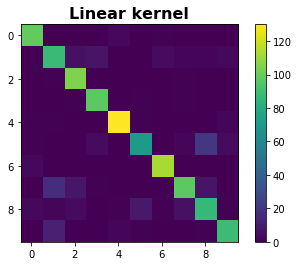

In [107]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
# making predictions
y_pred = svclassifier.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

im = plt.imshow(cm)
plt.colorbar(im)
plt.title('Linear kernel', fontweight='bold', fontsize=16)
print(cm)
print(cr)

In [37]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, StratifiedShuffleSplit, \
                                    RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import LinearSVC

from mne.decoding import cross_val_multiscore, LinearModel, \
                         GeneralizingEstimator, Scaler, Vectorizer

rand_state=45
max_iter=100000
cv = StratifiedShuffleSplit(n_splits=5, random_state=rand_state)


le = LabelEncoder()

bsvc = SVC(kernel='linear')
lsvc = LinearSVC(kernel='linear')
lsvc_l1 = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=1e-3, \
                    max_iter=max_iter)
lsvc2 = make_pipeline(StandardScaler(), LinearModel(LinearSVC(random_state=rand_state,\
                                                              max_iter=max_iter))
lsvc3 = make_pipeline(StandardScaler(), LinearModel(SVC(kernel='linear', \
                                                        random_state=rand_state, \
                                                        max_iter=max_iter)))           

paramSearch  = np.logspace(-2.3, -1.3, 10)
clf_sets = [(bsvc, paramSearch, X, Y),
            (lsvc, paramSearch, X, Y),
            (lsvc_l1, paramSearch, X, Y),
            (lsvc2, paramSearch, X, Y),
            (lsvc3, paramSearch, X, Y)]

for clf, cs, X, Y in clf_sets:


svc_scores = cross_val_multiscore(svclassifier, X, Y, cv=cv, n_jobs=1)
lsvc_scores = cross_val_multiscore(lsvclassifier, X, Y, cv=cv, n_jobs=1)

In [58]:
clf = SVC(kernel='poly', gamma='scale')
tot_split=20

svc_scores = np.zeros([tot_split,1])

for ns in range(tot_split):
    cv         = StratifiedShuffleSplit(n_splits=ns+1, random_state=rand_state)
    svc_score  = cross_val_multiscore(clf, X, Y, cv=cv, n_jobs=1)
    svc_scores[ns] = np.mean(svc_score, axis=0)
    print(ns+1, 'gives ', svc_scores[ns])

#best_split can be either 

1 gives  [0.952]
2 gives  [0.95866667]
3 gives  [0.94755556]
4 gives  [0.94666667]
5 gives  [0.9488]
6 gives  [0.95111111]
7 gives  [0.95085714]
8 gives  [0.949]
9 gives  [0.94844444]
10 gives  [0.94933333]
11 gives  [0.94787879]
12 gives  [0.94733333]
13 gives  [0.94830769]
14 gives  [0.94761905]
15 gives  [0.94648889]
16 gives  [0.94716667]
17 gives  [0.94682353]
18 gives  [0.94622222]
19 gives  [0.94526316]
20 gives  [0.94493333]


In [64]:
clf = SVC(kernel='linear', gamma='scale')
tot_split=20

svc_scores = np.zeros([tot_split,1])

for ns in range(tot_split):
    cv         = StratifiedShuffleSplit(n_splits=ns+1, random_state=rand_state)
    svc_score  = cross_val_multiscore(clf, X, Y, cv=cv, n_jobs=1)
    svc_scores[ns] = np.mean(svc_score, axis=0)
    print(ns+1, 'gives ', svc_scores[ns])

#best_split can be either 

1 gives  [0.85866667]
2 gives  [0.87466667]
3 gives  [0.87377778]
4 gives  [0.874]
5 gives  [0.87466667]
6 gives  [0.87688889]
7 gives  [0.87542857]
8 gives  [0.87233333]
9 gives  [0.87318519]
10 gives  [0.87733333]
11 gives  [0.87709091]
12 gives  [0.876]
13 gives  [0.87589744]
14 gives  [0.87409524]
15 gives  [0.87306667]
16 gives  [0.87333333]


KeyboardInterrupt: 

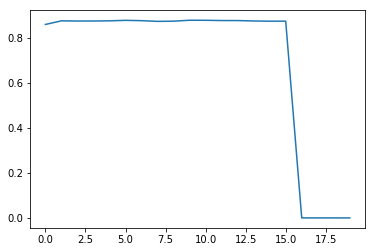

In [65]:
plt.plot(svc_scores)

In [ ]:
clf = SVC(kernel='linear', gamma='scale')
tot_split=20

svc_scores = np.zeros([tot_split,1])

for ns in range(tot_split):
    cv         = StratifiedShuffleSplit(n_splits=ns+1, random_state=rand_state)
    svc_score  = cross_val_multiscore(clf, X, Y, cv=cv, n_jobs=1)
    svc_scores[ns] = np.mean(svc_score, axis=0)
    print(ns+1, 'gives ', svc_scores[ns])

#best_split can be either 

In [61]:
np.argmax(svc_scores)

1

In [ ]:
svc_scores.T

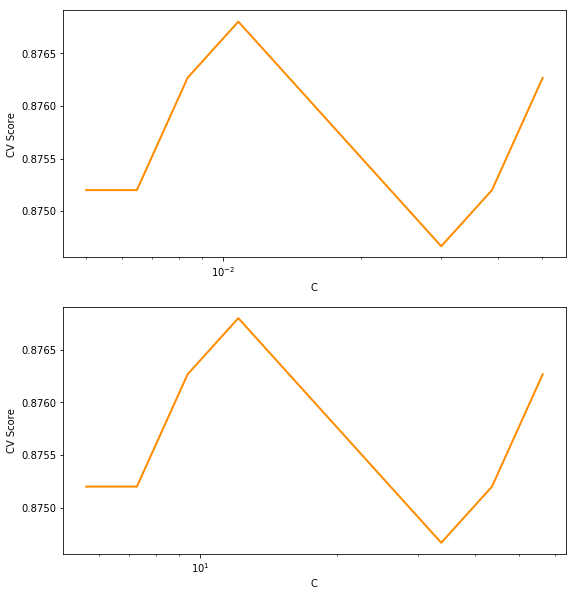

In [45]:
clf =  SVC(kernel='linear')


cs         = np.logspace(-2.3, -1.3, 10)
param_grid = dict(C=cs)
cv         = StratifiedShuffleSplit(n_splits=5, random_state=rand_state)
grid       = GridSearchCV(clf, refit=False, param_grid=param_grid,cv=cv)
grid.fit(X, Y)
scores = grid.cv_results_['mean_test_score']

scales = [(1, 'No scaling'),
          ((n_samples * train_size), '1/n_samples'),]

fig, axes = plt.subplots(nrows=2, sharey=True, figsize=(9, 10))
for ax, (scaler, name) in zip(axes, scales):
            ax.set_xlabel('C')
            ax.set_ylabel('CV Score')
            grid_cs = cs * float(scaler)  # scale the C's
            ax.semilogx(grid_cs, scores, label="fraction %.2f" %
                        train_size, color=colors[k], lw=lw)
#             ax.set_title('scaling=%s, penalty=%s, loss=%s' %
#                          (name, clf.penalty, clf.loss))

In [41]:
scores

array([0.85866667, 0.89066667, 0.872     , 0.87466667, 0.87733333])

In [ ]:
svc_scores = cross_val_multiscore(svclassifier, X, Y, cv=cv, n_jobs=1)
lsvc_scores = cross_val_multiscore(lsvclassifier, X, Y, cv=cv, n_jobs=1)

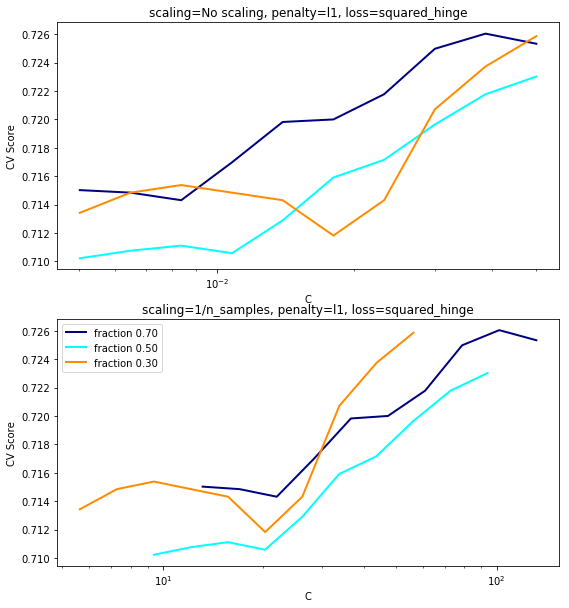

In [29]:
colors = ['navy', 'cyan', 'darkorange']
lw = 2

clf_sets = [(LinearSVC(penalty='l1', loss='squared_hinge', dual=False,
                       tol=1e-3),
                       np.logspace(-2.3, -1.3, 10), 
                       X, Y)]
for clf, cs, X, Y in clf_sets:
    # set up the plot for each regressor
    fig, axes = plt.subplots(nrows=2, sharey=True, figsize=(9, 10))

    for k, train_size in enumerate(np.linspace(0.3, 0.7, 3)[::-1]):
        param_grid = dict(C=cs)
        grid = GridSearchCV(clf, refit=False, param_grid=param_grid,
                            cv=ShuffleSplit(train_size=train_size, test_size=.3, n_splits=5, random_state=1))
        grid.fit(X, Y)
        scores = grid.cv_results_['mean_test_score']

        scales = [(1, 'No scaling'),
                  ((n_samples * train_size), '1/n_samples'),
                  ]

        for ax, (scaler, name) in zip(axes, scales):
            ax.set_xlabel('C')
            ax.set_ylabel('CV Score')
            grid_cs = cs * float(scaler)  # scale the C's
            ax.semilogx(grid_cs, scores, label="fraction %.2f" %
                        train_size, color=colors[k], lw=lw)
            ax.set_title('scaling=%s, penalty=%s, loss=%s' %
                         (name, clf.penalty, clf.loss))
            
    plt.legend(loc="best")
plt.show()

/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-

/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-

/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


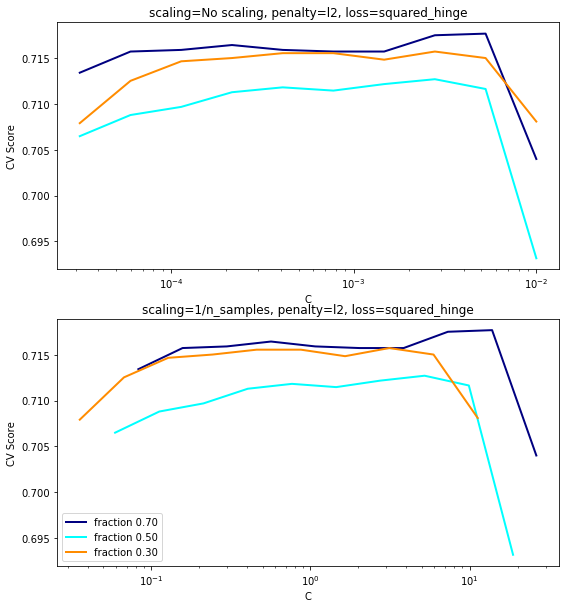

In [30]:
# clf_sets = [(LinearSVC(penalty='l1', loss='squared_hinge', dual=False,
#                        tol=1e-3),
#              np.logspace(-2.3, -1.3, 10), X, Y),
#             (LinearSVC(penalty='l2', loss='squared_hinge', dual=True),
#              np.logspace(-4.5, -2, 10), X, Y)]

colors = ['navy', 'cyan', 'darkorange']
lw = 2

clf_sets = [(LinearSVC(penalty='l2', loss='squared_hinge', dual=True,
                       tol=1e-3),
                       np.logspace(-4.5, -2, 10), 
                       X, Y)]
for clf, cs, X, Y in clf_sets:
    # set up the plot for each regressor
    fig, axes = plt.subplots(nrows=2, sharey=True, figsize=(9, 10))

    for k, train_size in enumerate(np.linspace(0.3, 0.7, 3)[::-1]):
        param_grid = dict(C=cs)
        grid = GridSearchCV(clf, refit=False, param_grid=param_grid,
                            cv=ShuffleSplit(train_size=train_size, test_size=.3, n_splits=5, random_state=1))
        grid.fit(X, Y)
        scores = grid.cv_results_['mean_test_score']

        scales = [(1, 'No scaling'),
                  ((n_samples * train_size), '1/n_samples'),
                  ]

        for ax, (scaler, name) in zip(axes, scales):
            ax.set_xlabel('C')
            ax.set_ylabel('CV Score')
            grid_cs = cs * float(scaler)  # scale the C's
            ax.semilogx(grid_cs, scores, label="fraction %.2f" %
                        train_size, color=colors[k], lw=lw)
            ax.set_title('scaling=%s, penalty=%s, loss=%s' %
                         (name, clf.penalty, clf.loss))
            
    plt.legend(loc="best")
plt.show()

# using kernels

/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 27   0  76   0   0   0   0   0   0   0]
 [  0  14  98   0   0   0   0   0   0   0]
 [  0   0 107   0   0   0   0   0   0   0]
 [  0   0  95   5   0   0   0   0   0   0]
 [  0   0 135   0   0   0   0   0   0   0]
 [  0   0 102   0   0   1   0   0   0   0]
 [  1   0 106   0   0   0   9   0   0   0]
 [  0   0 130   0   0   0   0   0   0   0]
 [  0   0 114   0   0   0   0   0   0   0]
 [  0   0 105   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.96      0.26      0.41       103
           1       1.00      0.12      0.22       112
           2       0.10      1.00      0.18       107
           3       1.00      0.05      0.10       100
           4       0.00      0.00      0.00       135
           5       1.00      0.01      0.02       103
           6       1.00      0.08      0.14       116
           7       0.00      0.00      0.00       130
           8       0.00      0.00      0.00       114
           9       0.00     

/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


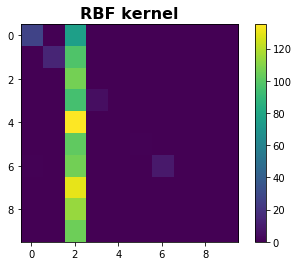

In [108]:
svclassifier2 = SVC(kernel='rbf')
svclassifier2.fit(x_train, y_train)

y_pred2 = svclassifier2.predict(x_test)

cm2 = confusion_matrix(y_test, y_pred2)
cr2 = classification_report(y_test, y_pred2)

im2 = plt.imshow(cm2)
plt.colorbar(im2)
plt.title('RBF kernel', fontweight='bold', fontsize=16)
print(cm2)
print(cr2)

/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  0   0   0   0 123   0   0   0   0   0]
 [  0   0   0   0 114   0   0   0   0   0]
 [  0   0   0   0 112   0   0   0   0   0]
 [  0   0   0   0 110   0   0   0   0   0]
 [  0   0   0   0 105   0   0   0   0   0]
 [  0   0   0   0 121   0   0   0   0   0]
 [  0   0   0   0  95   0   0   0   0   0]
 [  0   0   0   0 115   0   0   0   0   0]
 [  0   0   0   0 122   0   0   0   0   0]
 [  0   0   0   0 108   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.00      0.00      0.00       114
           2       0.00      0.00      0.00       112
           3       0.00      0.00      0.00       110
           4       0.09      1.00      0.17       105
           5       0.00      0.00      0.00       121
           6       0.00      0.00      0.00        95
           7       0.00      0.00      0.00       115
           8       0.00      0.00      0.00       122
           9       0.00     

/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


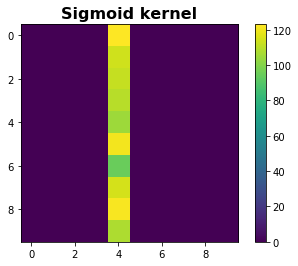

In [111]:
svclassifier3 = SVC(kernel='sigmoid')
svclassifier3.fit(x_train, y_train)

y_pred3 = svclassifier3.predict(x_test)

cm3 = confusion_matrix(y_test, y_pred3)
cr3 = classification_report(y_test, y_pred3)


im3 = plt.imshow(cm3)
plt.colorbar(im3)
plt.title('Sigmoid kernel', fontweight='bold', fontsize=16)
print(cm3)
print(cr3)

/Users/Maryam/anaconda3/envs/DeepLearningEEG/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[122   0   0   0   1   0   0   0   0   0]
 [  0 111   1   0   0   0   0   1   0   1]
 [  0   1 109   1   0   0   0   1   0   0]
 [  0   3   0 107   0   0   0   0   0   0]
 [  0   0   0   0 103   0   0   0   0   2]
 [  0   0   0   4   0 116   0   0   1   0]
 [  4   0   0   0   1   0  90   0   0   0]
 [  0   4   3   1   0   0   0 105   2   0]
 [  0   2   1   0   0   2   0   1 115   1]
 [  0   2   0   2   2   3   0   0   0  99]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       123
           1       0.90      0.97      0.94       114
           2       0.96      0.97      0.96       112
           3       0.93      0.97      0.95       110
           4       0.96      0.98      0.97       105
           5       0.96      0.96      0.96       121
           6       1.00      0.95      0.97        95
           7       0.97      0.91      0.94       115
           8       0.97      0.94      0.96       122
           9       0.96     

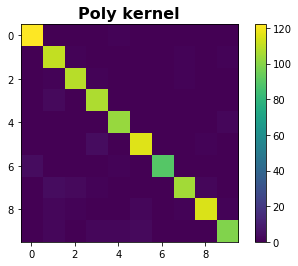

In [124]:
svclassifier4 = SVC(kernel='poly')
svclassifier4.fit(x_train, y_train)

y_pred4 = svclassifier4.predict(x_test)

cm4 = confusion_matrix(y_test, y_pred4)
cr4 = classification_report(y_test, y_pred4)


im4 = plt.imshow(cm4)
plt.colorbar(im4)
plt.title('Poly kernel', fontweight='bold', fontsize=16)
print(cm4)
print(cr4)

(4,)


Text(0.5,1,'Poly kernel')

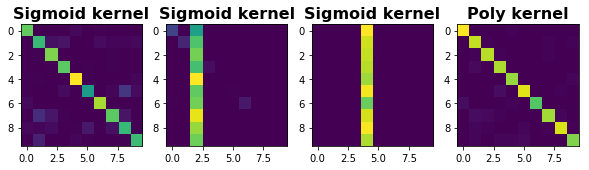

In [126]:
fig, ax = plt.subplots(1,4,figsize=(10,10))
print(ax.shape)


im = ax[0].imshow(cm)
ax[0].set_title('Sigmoid kernel', fontweight='bold', fontsize=16)

im2 = ax[1].imshow(cm2)
ax[1].set_title('Sigmoid kernel', fontweight='bold', fontsize=16)


im3 = ax[2].imshow(cm3)
ax[2].set_title('Sigmoid kernel', fontweight='bold', fontsize=16)

im4 = ax[3].imshow(cm4)
ax[3].set_title('Poly kernel', fontweight='bold', fontsize=16)




# visualization

In [55]:
# Adapted from 
# https://www.dummies.com/programming/big-data/data-science/how-to-visualize-the-classifier-in-an-svm-supervised-learning-model/

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)

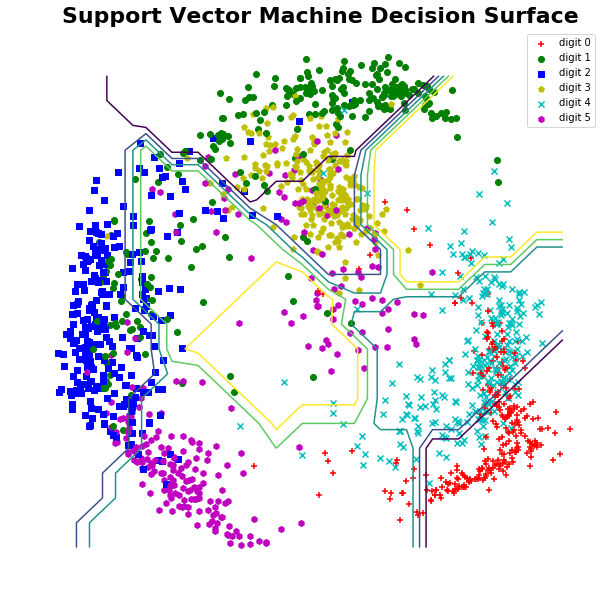

done


In [95]:
import matplotlib.pylab as pl

fig= plt.figure(figsize=(10,10))

for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c0 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',  marker='+')
    elif y_train[i] == 1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    marker='o')
    elif y_train[i] == 2:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    marker='s')
    elif y_train[i] == 3:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',    marker='p')
    elif y_train[i] == 4:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='c',    marker='x')
    elif y_train[i] == 5:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='m',    marker='h')

        
pl.legend([c0, c1, c2, c3, c4, c5], ['digit 0', 'digit 1', 'digit 2','digit 3', 'digit 4', 'digit 5'])
pl.title('Training dataset with 3 classes and known outcomes')


svclassifier_2d = SVC(kernel='linear')
svclassifier_2d.fit(pca_2d, y_train)

x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 10),   np.arange(y_min, y_max, 10))

Z = svclassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface', fontweight='bold', fontsize=22)
pl.axis('off')
pl.show()



print('done')

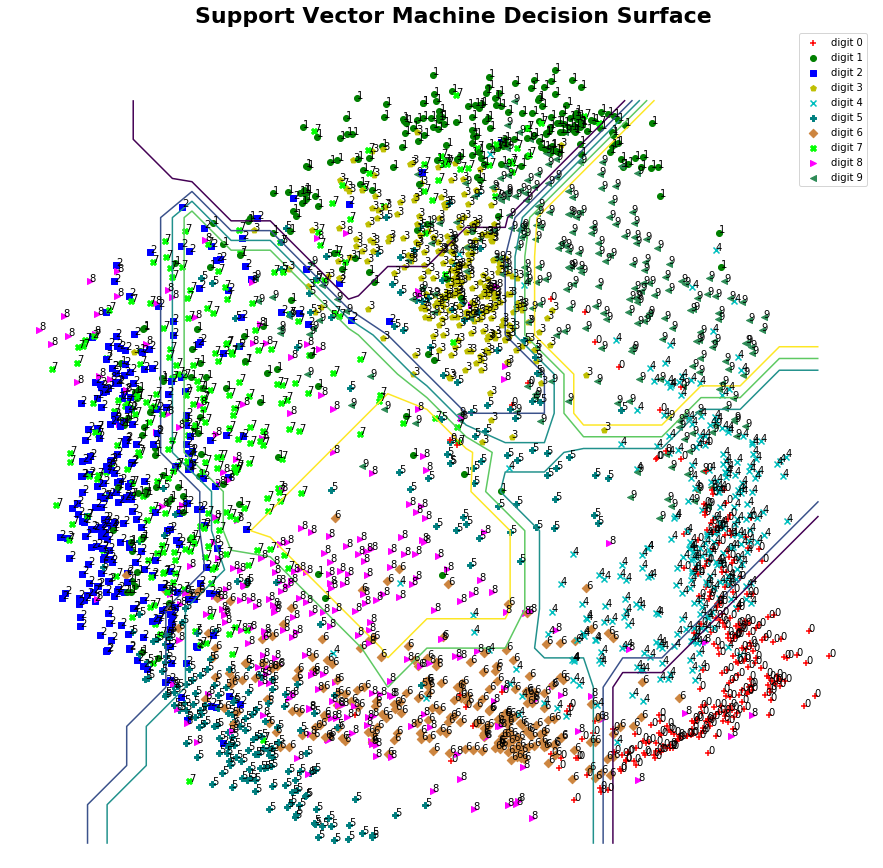

done


In [101]:
import matplotlib.pylab as pl

fig= plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
                     
for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c0 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',  marker='+')
    elif y_train[i] == 1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    marker='o')
    elif y_train[i] == 2:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    marker='s')
    elif y_train[i] == 3:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='y',    marker='p')
    elif y_train[i] == 4:
        c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='c',    marker='x')
    elif y_train[i] == 5:
        c5 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='teal',    marker='P')
    elif y_train[i] == 6:
        c6 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='peru',  marker='D')
    elif y_train[i] == 7:
        c7 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='lime',    marker='X')
    elif y_train[i] == 8:
        c8 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='fuchsia',    marker='>')
    elif y_train[i] == 9:
        c9 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='seagreen',    marker='<')

    ax.annotate(str(y_train[i]), (pca_2d[i,0],pca_2d[i,1]))
    
pl.legend([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9],\
          ['digit 0', 'digit 1', 'digit 2','digit 3', 'digit 4', 'digit 5',\
           'digit 6', 'digit 7', 'digit 8','digit 9' ])
pl.title('Training dataset with 3 classes and known outcomes')


svclassifier_2d = SVC(kernel='linear')
svclassifier_2d.fit(pca_2d, y_train)

x_min, x_max = pca_2d[:, 0].min() - 1,   pca_2d[:,0].max() + 1
y_min, y_max = pca_2d[:, 1].min() - 1,   pca_2d[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 10),   np.arange(y_min, y_max, 10))

Z = svclassifier_2d.predict(np.c_[xx.ravel(),  yy.ravel()])
Z = Z.reshape(xx.shape)
pl.contour(xx, yy, Z)
pl.title('Support Vector Machine Decision Surface', fontweight='bold', fontsize=22)
pl.axis('off')
pl.show()



print('done')